In [6]:
!pip show tensorflow


Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


In [7]:
import tensorflow as tf

In [8]:
print(tf.__version__)

2.19.0


In [9]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Importing the dataset
dataset = pd.read_csv(C:\Users\bhong\OneDrive\Desktop\TECHNOLOGY\DATASCIENCE\Deep Learning\Churn_Modelling.csv)
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

SyntaxError: invalid syntax (ipython-input-2614453110.py, line 2)

In [14]:
X

NameError: name 'X' is not defined

In [15]:
y

NameError: name 'y' is not defined

In [16]:

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

NameError: name 'X' is not defined

In [17]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


NameError: name 'X' is not defined

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Part 2 - Now let's make the ANN!

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7962 - loss: 3.2844 - val_accuracy: 0.7955 - val_loss: 3.2956
Epoch 2/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7962 - loss: 3.2844 - val_accuracy: 0.7955 - val_loss: 3.2956
Epoch 3/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7962 - loss: 3.2844 - val_accuracy: 0.7955 - val_loss: 3.2956
Epoch 4/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7962 - loss: 3.2844 - val_accuracy: 0.7955 - val_loss: 3.2956
Epoch 5/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7962 - loss: 3.2844 - val_accuracy: 0.7955 - val_loss: 3.2956
Epoch 6/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7962 - loss: 3.2844 - val_accuracy: 0.7955 - val_loss: 3.2956
Epoch 7/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7962 - loss: 3.2844 - val_accuracy: 0.7955 - val_loss: 3.2956
Epoch 8/50
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7962 - loss: 3.2844 - val_accuracy: 0.

In [ ]:
# list all data in history

print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


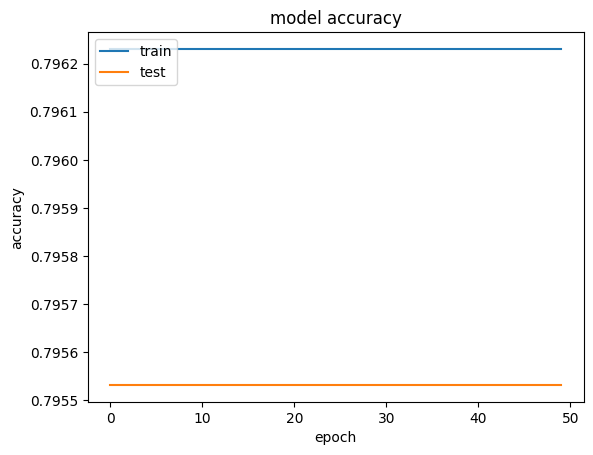

In [ ]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

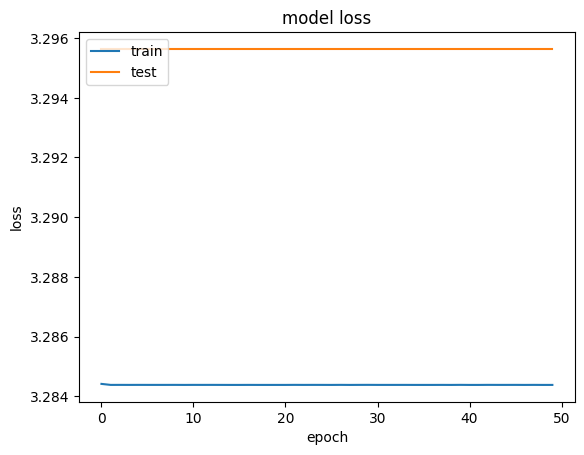

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [ ]:
score

0.7975